This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [4]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [8]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [11]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [12]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [27]:
# 1.  You used two hidden layers. Try using one or three hidden layers, and
#see how doing so affects validation and test accuracy.   
#2. Try using layers with more hidden units or fewer hidden units: 32 units,
# 64 units, and so on.   
#3. Try using the mse loss function instead of binary_crossentropy.   
#4. Try using the tanh activation (an activation that was popular in the early
# days of neural networks) instead of relu.

from tensorflow import keras
from tensorflow.keras import layers

#model = keras.Sequential([
 #   layers.Dense(16, activation="relu"),
  #  layers.Dense(16, activation="relu"),
   # layers.Dense(1, activation="sigmoid")
#])
#model = keras.Sequential([
    #layers.Dense(32, activation="tanh"),
   # layers.Dense(32, activation="tanh"),
  #  layers.Dense(32, activation="tanh"),
 #   layers.Dense(1, activation="sigmoid")
#])
#model = keras.Sequential([
 #   layers.Dense(32, activation="tanh"),
  #  layers.Dense(1, activation="sigmoid")
#])
#model = keras.Sequential([
 #   layers.Dense(64, activation="tanh"),
  #  layers.Dense(64, activation="tanh"),
   # layers.Dense(64, activation="tanh"),
    #layers.Dense(1, activation="sigmoid")
#])
model = keras.Sequential([
   layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])


**Compiling the model**

In [28]:
#model.compile(optimizer="rmsprop",
 #             loss="binary_crossentropy",
  #            metrics=["accuracy"])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])


### Validating your approach

**Setting aside a validation set**

In [29]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 125ms/step - loss: 0.1664 - accuracy: 0.7596 - val_loss: 0.1148 - val_accuracy: 0.8648
Epoch 2/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0961 - accuracy: 0.8856 - val_loss: 0.0976 - val_accuracy: 0.8724
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0773 - accuracy: 0.9083 - val_loss: 0.0979 - val_accuracy: 0.8673
Epoch 4/20
30/30 [==============================] - 2s 59ms/step - loss: 0.0670 - accuracy: 0.9177 - val_loss: 0.0937 - val_accuracy: 0.8713
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0591 - accuracy: 0.9284 - val_loss: 0.0847 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0547 - accuracy: 0.9321 - val_loss: 0.0837 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 2s 70ms/step - loss: 0.0457 - accuracy: 0.9469 - val_loss: 0.0945 - val_accuracy: 0.8701
Epoch 8/20
3

In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

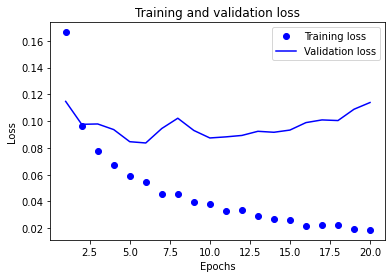

In [32]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

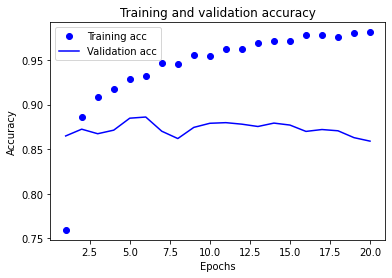

In [33]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [37]:
#model = keras.Sequential([
 #   layers.Dense(16, activation="relu"),
  #  layers.Dense(16, activation="relu"),
   # layers.Dense(1, activation="sigmoid")
#])
#model = keras.Sequential([
    #layers.Dense(32, activation="tanh"),
   # layers.Dense(32, activation="tanh"),
  #  layers.Dense(32, activation="tanh"),
 #   layers.Dense(1, activation="sigmoid")
#])
#model = keras.Sequential([
 #   layers.Dense(32, activation="tanh"),
  #  layers.Dense(1, activation="sigmoid")
#])
#model = keras.Sequential([
 #   layers.Dense(64, activation="tanh"),
  #  layers.Dense(64, activation="tanh"),
   # layers.Dense(64, activation="tanh"),
    #layers.Dense(1, activation="sigmoid")
#])
model = keras.Sequential([
   layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
#model.compile(optimizer="rmsprop",
 #             loss="binary_crossentropy",
  #            metrics=["accuracy"]) 
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 55ms/step - loss: 0.1456 - accuracy: 0.8052
Epoch 2/4
49/49 [==============================] - 3s 55ms/step - loss: 0.0866 - accuracy: 0.8931
Epoch 3/4
49/49 [==============================] - 4s 74ms/step - loss: 0.0716 - accuracy: 0.9111
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.0964 - accuracy: 0.8686


In [38]:
results

[0.09635405987501144, 0.8685600161552429]

### Using a trained model to generate predictions on new data

In [39]:
model.predict(x_test)

782/782 [==============================] - 5s 6ms/step


array([[0.11381666],
       [0.9989727 ],
       [0.5573028 ],
       ...,
       [0.07267836],
       [0.05383357],
       [0.25925353]], dtype=float32)